## titanic 데이터 셋으로 pandas 익히기

- titanic 데이터 시각화 
- https://kaggle-kr.tistory.com/17

In [47]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

# 한글 출력을 위한 설정
import matplotlib
matplotlib.rcParams['font.family']="NanumBarunGothic"
matplotlib.rcParams['axes.unicode_minus'] = False

In [33]:
# titanic 데이터 셋 
titanic = sb.load_dataset('titanic')
print(type(titanic))

<class 'pandas.core.frame.DataFrame'>


####  성별 평균 생존율

In [3]:
titanic.pivot_table('survived', 'sex', aggfunc = 'mean')

,survived
sex,
female,0.742038
male,0.188908


#### pclas 별 평균 생존율

In [4]:
titanic.pivot_table('survived', 'pclass', aggfunc = 'mean')

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


#### embark_town  별 평균   pclass

In [5]:
titanic.pivot_table('pclass', 'embark_town', aggfunc = 'mean')

,pclass
embark_town,
Cherbourg,1.886905
Queenstown,2.909091
Southampton,2.350932


In [6]:
titanic.pivot_table('survived', 'embark_town', aggfunc = 'mean')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


## qcut( ) : Quantile-based discretization function
- [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html?highlight=qcut#pandas.qcut)

In [7]:
# fare --> 3 fare class

titanic['fare_class'] = pd.qcut(titanic.fare, 3, labels=['Third', 'Second', 'First'])
titanic['pclass2'] = titanic['pclass']
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_class,pclass2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Second,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,First,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Second,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,First,1


### qcut( ) 함수를 사용해. AGE 를  5등급으로 나눠서 컬럼 생성 

In [8]:
titanic['age'].min(), titanic['age'].max(), titanic['age'].mean()

(0.42, 80.0, 29.69911764705882)

In [9]:
titanic['age_class'] = pd.qcut(titanic.age, 5, labels=['child', 'young', 'middle', 'old', 'very_old'])
titanic

# titanic.drop(columns=['fare_age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_class,pclass2,age_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third,3,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First,1,old
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third,3,middle
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First,1,old
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third,3,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Second,2,middle
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,First,1,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Second,3,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,First,1,middle


### age_class 별 평균 생존율  
- Pivot_table 이용하기 [pandas.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html?highlight=pivot_table#pandas.pivot_table)
```python 
pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) → 'DataFrame'[source]
```

In [10]:
titanic.pivot_table('survived', 'age_class', aggfunc='mean')

,survived
age_class,
child,0.481707
young,0.328467
middle,0.393701
old,0.437500
very_old,0.373239


In [11]:
titanic.pivot_table(values='survived',index='age_class',aggfunc='mean')

,survived
age_class,
child,0.481707
young,0.328467
middle,0.393701
old,0.437500
very_old,0.373239


In [12]:
titanic.pivot_table('survived', index=['sex', 'age_class'], aggfunc='mean')

survived
sex    age_class          
female child      0.706667
       young      0.723404
       middle     0.727273
       old        0.843137
       very_old   0.795455
male   child      0.292135
       young      0.122222
       middle     0.216867
       old        0.215054
       very_old   0.183673

### age를 5등급으로 qcut()으로 나눴는데요. 이렇게 나눠진 연령범위를 숫자로 확인

In [13]:
# from scipy.stats import scoreatpercentile

# print('20%:', scoreatpercentile(titanic['age'], 20))
# print('40%:', scoreatpercentile(titanic['age'], 40))
# print('50%:', scoreatpercentile(titanic['age'], 50))
# print('60%:', scoreatpercentile(titanic['age'], 60))
# print('80%:', scoreatpercentile(titanic['age'], 80))

In [14]:
# Series 객체의 quantile() 함수
titanic['age'].quantile([.2, .4, .6, .8, 1])

0.2    19.0
0.4    25.0
0.6    31.8
0.8    41.0
1.0    80.0
Name: age, dtype: float64

In [15]:
# qcut()으로 5등급 분할범위 확인하기 
pd.qcut(titanic.age, 5)

0       (19.0, 25.0]
1       (31.8, 41.0]
2       (25.0, 31.8]
3       (31.8, 41.0]
4       (31.8, 41.0]
           ...      
886     (25.0, 31.8]
887    (0.419, 19.0]
888              NaN
889     (25.0, 31.8]
890     (31.8, 41.0]
Name: age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

### 19 세 이하 몇 명? 

In [16]:
titanic[titanic['age'] < 19]['age'].count()  

139

### 날짜 다루기 

In [17]:
# POSIX 시간 표기법 : 1970년 1월 1일 (1677~2262)
pd.date_range('9/22/1677', periods=4, freq='D')

DatetimeIndex(['1677-09-22', '1677-09-23', '1677-09-24', '1677-09-25'], dtype='datetime64[ns]', freq='D')

#### 날짜 계산하기 

In [18]:
date1 = '2020-04-23'
date2 = '2020/04/24'
date3 = '2020 04 24'


type(date1)

d1 = pd.to_datetime([date1])
d2 = pd.to_datetime([date2])
d3 = pd.to_datetime([date3])
print(type(d1))

t = d3 - d1
print(t)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
TimedeltaIndex(['1 days'], dtype='timedelta64[ns]', freq=None)


## [ Titanic 생존자 데이터셋 실습 과제 ]

1. 아래와 같이 titanic 데이터 셋을 아래와 같이 읽어와서
   처리하는 코드를 구현하세요
```python 
  import seaborn as sb
  titanic = sb.load_dataset('titanic')
```

### 컬럼
  
  ◾Survived: 생존 여부 => 0 = No, 1 = Yes
  
  ◾pclass: 티켓 등급 => 1 = 1st, 2 = 2nd, 3 = 3rd
  
  ◾Sex: 성별
  
  ◾Age: 나이
  
  ◾Sibsp: 함께 탑승한 형제자매, 배우자의 수
  
  ◾Parch: 함께 탑승한 부모, 자식의 수
  
  ◾Ticket: 티켓 번호
  
  ◾Fare: 운임
  
  ◾Cabin: 객실 번호
  
  ◾Embarked: 탑승 항구 => C = Cherbourg, Q = Queenstown, S = Southampton


### 1.1 titanic_new.csv로 저장하고 컬럼별 통계를 출력하세요

In [19]:
titanic.to_csv('titanic_new.csv')

In [20]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,pclass2
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.308642
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.836071
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [21]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_class,pclass2,age_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third,3,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First,1,old
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third,3,middle
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First,1,old
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third,3,old


###  1.2 결측치를 평균값으로 수정하여 titanic_new_no_nan.csv 로 저장하세요

In [22]:
titanic_new = titanic.fillna(titanic.mean())

titanic_new.to_csv('titanic_new_no_nan.csv ')

###  1.3 생존자와 사망자의 수를 각각 구하세요

In [23]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

### 1.4 등급별(pclass) 평균 생존률을 구하시오

In [24]:
titanic.pivot_table('survived', 'pclass', aggfunc='mean')

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


### 1.5 성별(sex) 평균 생존률을 구하시오

In [25]:
titanic.pivot_table('survived', 'sex', aggfunc='mean')

,survived
sex,
female,0.742038
male,0.188908


###   1.6 연령별(age) 평균 생존률을 구하시오

In [26]:
titanic.pivot_table('survived', 'age', aggfunc='mean')

,survived
age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


### 1.7 sibsp(가족과 탑승)의 평균 생존률을 구하시오

In [27]:
titanic.pivot_table('survived', 'sibsp', aggfunc='mean')

,survived
sibsp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### 1.8 등급별 티켓 비용(fare)의 평균을 구하시오

In [28]:
titanic.pivot_table('fare', 'pclass', aggfunc='mean')

,fare
pclass,
1,84.154687
2,20.662183
3,13.675550


### 1.9 deck 칼럼을 삭제하여 새 데이터 프레임에 할당하고
      결과를 출력하세요 

In [29]:
titanic_drop_deck = titanic.drop(columns=['deck'])
titanic_drop_deck

# titanic = titanic.drop(columns=['fare_age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_class,pclass2,age_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Third,3,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,First,1,old
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Third,3,middle
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,First,1,old
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Third,3,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,Second,2,middle
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,First,1,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False,Second,3,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,First,1,middle


###   1.10 pandas의 qcut()을 사용하여 나이를 'age_class' 이름으로 3등급('young','middle','old')으로 나누고  


In [30]:
titanic['age_class'] = pd.qcut(titanic.age, 3, labels=['young', 'middle', 'old'])
titanic



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_class,pclass2,age_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Third,3,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,First,1,old
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Third,3,middle
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,First,1,old
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Third,3,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Second,2,middle
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,First,1,young
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Second,3,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,First,1,middle


### 1.11  index를 'sex'와 'age_class'로 columns을 'pclass'로 하는  3등급별(pclass) 평균 생존률을 구하시오

In [31]:
# titanic.pivot_table('survived', 'pclass', aggfunc='mean')
# titanic.pivot_table(), index=['sex', 'age_class'], aggfunc='mean')
titanic.pivot_table(values='survived', index=['sex', 'age_class'], columns= 'pclass', aggfunc='mean')

pclass                   1         2         3
sex    age_class                              
female young      0.954545  1.000000  0.508475
       middle     0.947368  0.909091  0.481481
       old        0.977273  0.857143  0.250000
male   young      0.500000  0.357143  0.158879
       middle     0.500000  0.076923  0.195652
       old        0.347826  0.062500  0.055556

### 2.1 생존자와 사망자 수를 pie 차트로 그리시오 (matplotlib)

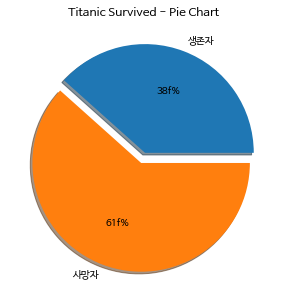

In [48]:
survived = titanic['survived'][titanic['survived'] == 1].count()

not_survivied = titanic['survived'][titanic['survived'] == 0].count()


data = [survived, not_survivied]

pie_label = ['생존자', '사망자']
exp = [0.05, 0.05]
plt.figure(figsize=(5,5))
plt.pie(data, labels=pie_label, explode=exp,
       autopct='%.if%%', shadow=True)

plt.title('Titanic Survived - Pie Chart')
plt.show()